In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
%matplotlib inline

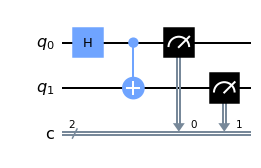

In [2]:
circuit = QuantumCircuit(2, 2)

circuit.h(0)
circuit.cx(0,1)

circuit.measure([0,1],[0,1])

circuit.draw(output="mpl")

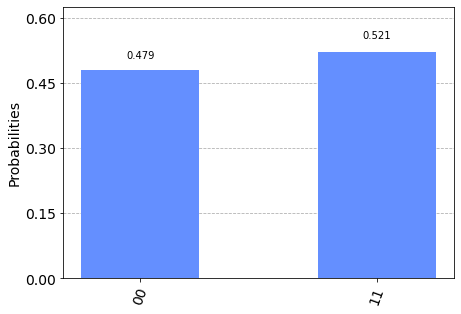

In [3]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=simulator).result()

counts = result.get_counts()

plot_histogram(counts)

In [4]:
array = [0,1]
array[0:2]

[0, 1]

In [5]:
circuit.qasm(formatted=True, filename="entanglement.qasm")

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



In [ ]:
from qiskit import IBMQ
import qiskit.tools.jupyter
%matplotlib inline

qiskit_token = ""

if not IBMQ.active_account():
    IBMQ.save_account(qiskit_token, overwrite=True)
    IBMQ.load_account()
    
provider = IBMQ.get_provider()
available_backends = provider.backends(filters=lambda b: b.configuration().n_qubits > 1 and b.status().operational)

#%qiskit_backend_overview

In [50]:
provider = IBMQ.get_provider()
IBMQ.update_account()
provider_back = IBMQ.get_provider()
device = provider_back.get_backend('ibmq_16_melbourne')

print(device.status())
#%qiskit_backend_monitor_device

Found 1 credentials.
No credentials available for updating could be found. No action will be performed.
Warnings:
The stored account with url "https://auth.quantum-computing.ibm.com/api" is already an IBM Q Experience v2 account.


In [57]:
for backend in Aer.backends():
    print(backend.name())
    
print("")

print("{0:20} {1:<10}".format("Name", "#Qubits"))
print("{0:20} {1:<10}".format("----", "-------"))
for n in range(0, len(available_backends)):
    backend = provider.get_backend(str(available_backends[n]))
    print("{0:20} {1:<10}".format(backend.name(), backend.configuration().n_qubits))

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator

Name                 #Qubits   
----                 -------   
ibmq_qasm_simulator  32        
ibmqx2               5         
ibmq_16_melbourne    15        
ibmq_athens          5         
ibmq_santiago        5         
ibmq_lima            5         
ibmq_belem           5         
ibmq_quito           5         
simulator_statevector 32        
simulator_mps        100       
simulator_extended_stabilizer 63        
simulator_stabilizer 5000      




Qubit data for backend: ibmq_belem


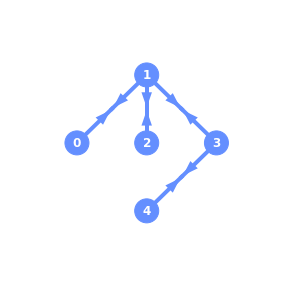

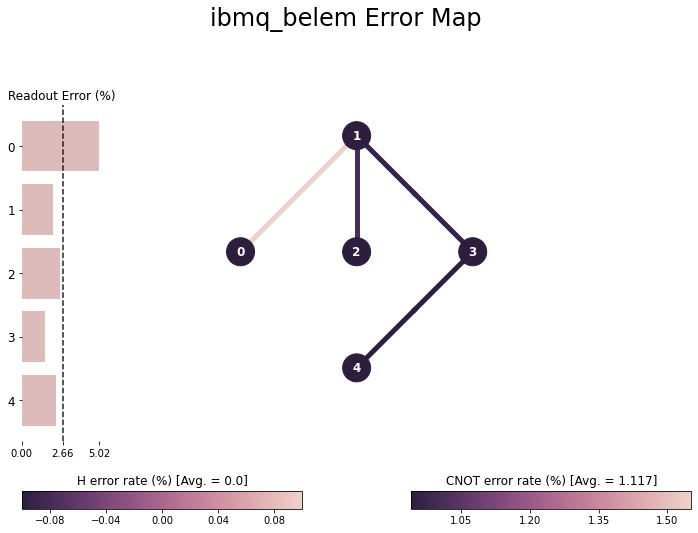

In [69]:
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_gate_map, plot_error_map

backend_dev = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits > 1 and b.status().operational and not b.configuration().simulator))

print("")
print("\nQubit data for backend:", backend_dev.status().backend_name)

display(plot_gate_map(backend_dev, plot_directed=True))
display(plot_error_map(backend_dev))

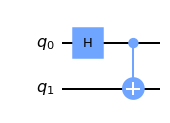

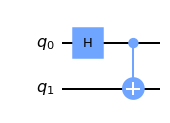

In [68]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

display(qc.draw('mpl'))

qc_transpiled = transpile(qc, backend=backend, optimization_level=1)
display(qc_transpiled.draw('mpl'))

In [11]:
%qiskit_version_table

In [10]:
%qiskit_copyright